# Task 5, Homework 3 - Machine Learning
## L1 & L2 Regularization for Logistic Regression

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

In [3]:
import scipy.sparse.linalg
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset['Target'] = y

### 1. Use a pairplot to see the relationships between the features in the dataset.

C:\Users\wozni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wozni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wozni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be re

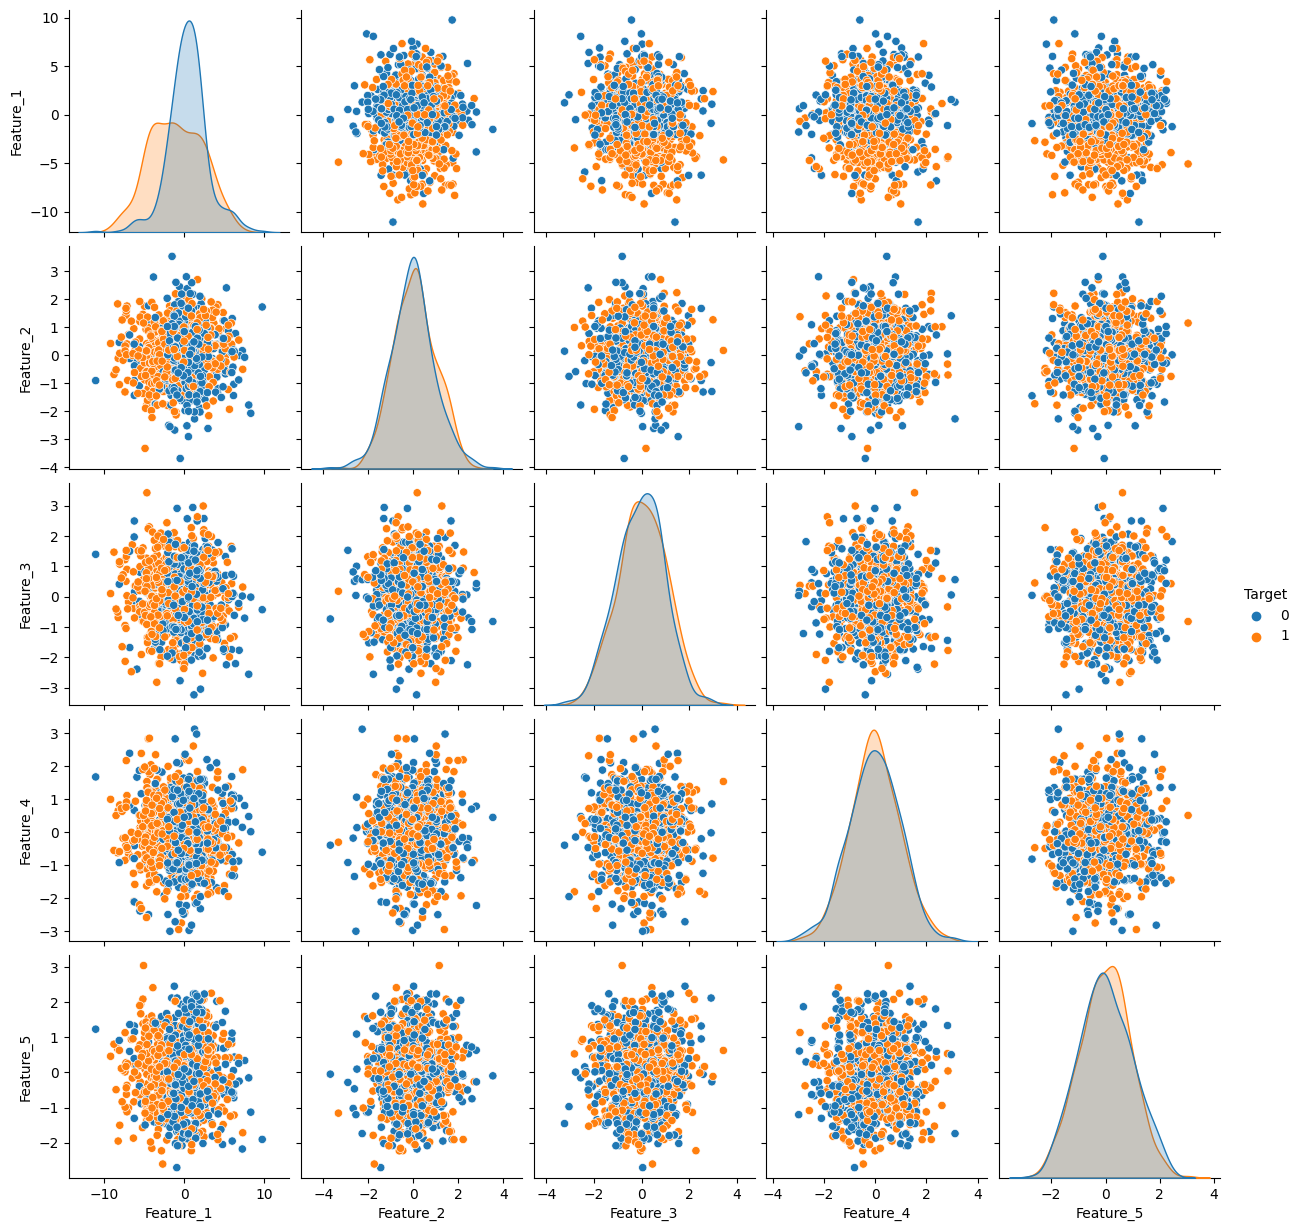

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset, hue='Target', vars=[f"Feature_{i}" for i in range(1, 6)])
plt.show()

### 2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.

Let's start by importing logistic regression function that we created before

In [5]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    N, K = X.shape
    beta = np.zeros(K)
    
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, beta))
        gradient = np.dot(X.T, (y - predictions)) / N
        beta += learning_rate * gradient
    return beta

Then we will measure accuracy of our model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
beta = gradient_descent(X_train, y_train, learning_rate=0.1, iterations=1000)
predictions = sigmoid(np.dot(X_test, beta)) > 0.5

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7950


### 3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?

Let's start with adding regularization to our function

In [7]:
def gradient_descent_with_regularization(X, y, learning_rate=0.01, iterations=1000, regularization_type=None, lambda_reg=0.1):
    N, K = X.shape
    beta = np.zeros(K)
    
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, beta))
        gradient = np.dot(X.T, (y - predictions)) / N
        
        if regularization_type == "L1":
            gradient -= lambda_reg * np.sign(beta)
        elif regularization_type == "L2":
            gradient -= lambda_reg * beta
        
        beta += learning_rate * gradient
    
    return beta

Run function on the data and compare both regularizations

In [19]:
beta_l1 = gradient_descent_with_regularization(X_train, y_train, learning_rate=0.1, iterations=1000, regularization_type="L1", lambda_reg=0.1)
beta_l2 = gradient_descent_with_regularization(X_train, y_train, learning_rate=0.1, iterations=1000, regularization_type="L2", lambda_reg=0.1)

predictions_l1 = sigmoid(np.dot(X_test, beta_l1)) > 0.5
predictions_l2 = sigmoid(np.dot(X_test, beta_l2)) > 0.5

accuracy_l1 = accuracy_score(y_test, predictions_l1)
accuracy_l2 = accuracy_score(y_test, predictions_l2)

print(f"Accuracy with L1 regularization: {accuracy_l1:.4f}")
print(f"Accuracy with L2 regularization: {accuracy_l2:.4f}")

Accuracy with L1 regularization: 0.7900
Accuracy with L2 regularization: 0.7950


Accuracy with L1 regularization is a little lower, while with L2 accuracy is exactly the same - seems like in this case, method that isn't dropping entire weights (L2) is a bit better

### 4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

Selected features by L1 regularization: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20']


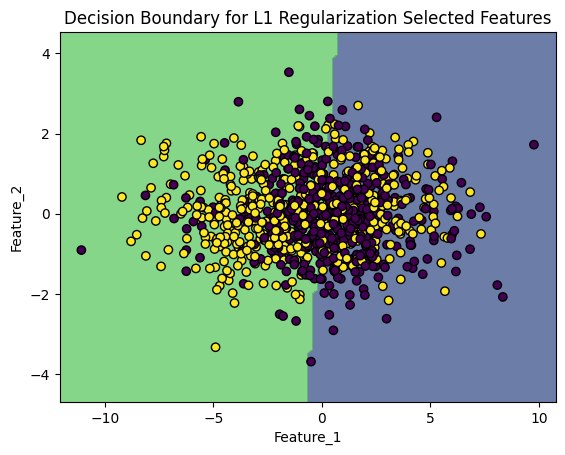

In [17]:
selected_features_l1 = [f"Feature_{i+1}" for i in range(20) if beta_l1[i] != 0]
print(f"Selected features by L1 regularization: {selected_features_l1}")

if len(selected_features_l1) >= 2:
    selected_indices = [int(feature.split('_')[1]) - 1 for feature in selected_features_l1[:2]]
    X_selected = X[:, selected_indices]

    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], beta_l1[selected_indices])) > 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Decision Boundary for L1 Regularization Selected Features")
    plt.xlabel(selected_features_l1[0])
    plt.ylabel(selected_features_l1[1])
    plt.show()

We can see that in this case, regularization didn't too too much